<a href="https://colab.research.google.com/github/Srinu2307/ShadowFox-Data-Science---mini--projects/blob/main/AQI_Air_Quality_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("/content/delhi_aqi.csv")

In [2]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [3]:
data.shape

(18776, 8)

In [4]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18776 entries, 2020-11-25 01:00:00 to 2023-01-24 08:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      18776 non-null  float64
 1   no      18776 non-null  float64
 2   no2     18776 non-null  float64
 3   o3      18776 non-null  float64
 4   so2     18776 non-null  float64
 5   pm2_5   18776 non-null  float64
 6   pm10    18776 non-null  float64
 7   nh3     18776 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
data.dtypes

,0
co,float64
no,float64
no2,float64
o3,float64
so2,float64
pm2_5,float64
pm10,float64
nh3,float64


In [7]:
data.isnull().sum()

,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


In [8]:
correlation_matrix = data.corr()

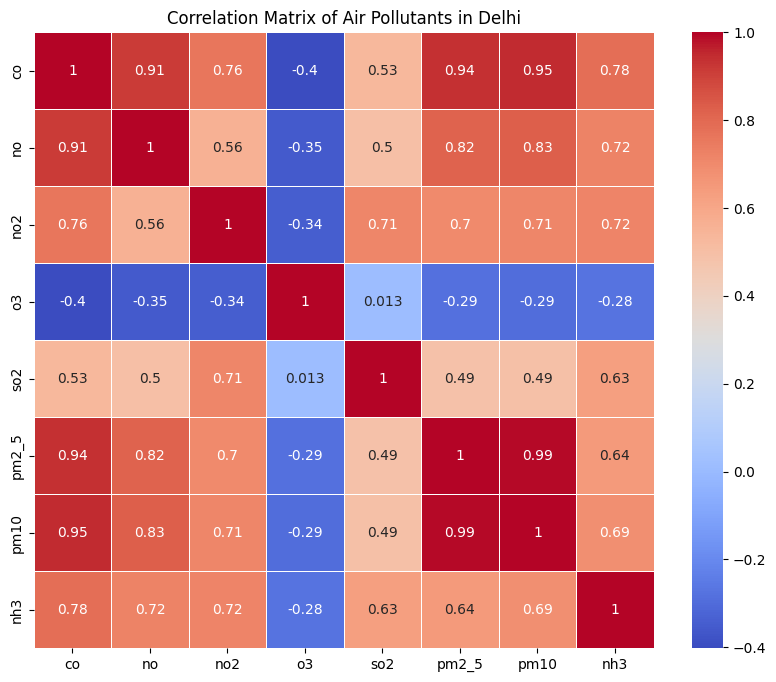

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv("/content/delhi_aqi.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants in Delhi')
plt.show()

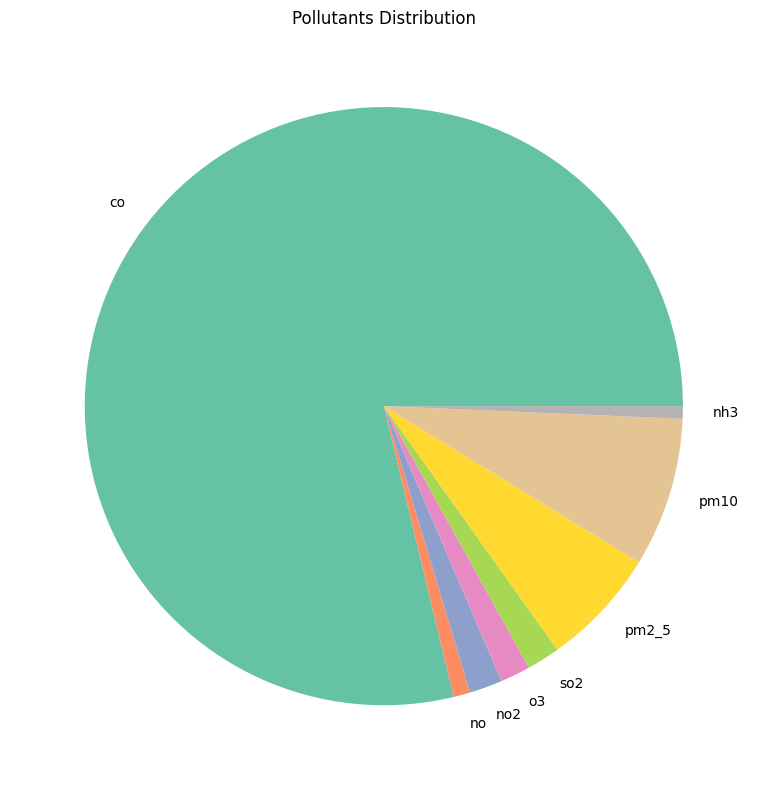

In [11]:
values = data[['co','no','no2','o3','so2','pm2_5','pm10','nh3']].sum(axis=0)
pollutants = list(['co','no','no2','o3','so2','pm2_5','pm10','nh3'])
sns.set_palette('Set2')
plt.figure(figsize =(12,8))
plt.pie(values, labels = pollutants)
plt.title('Pollutants Distribution')
plt.tight_layout()

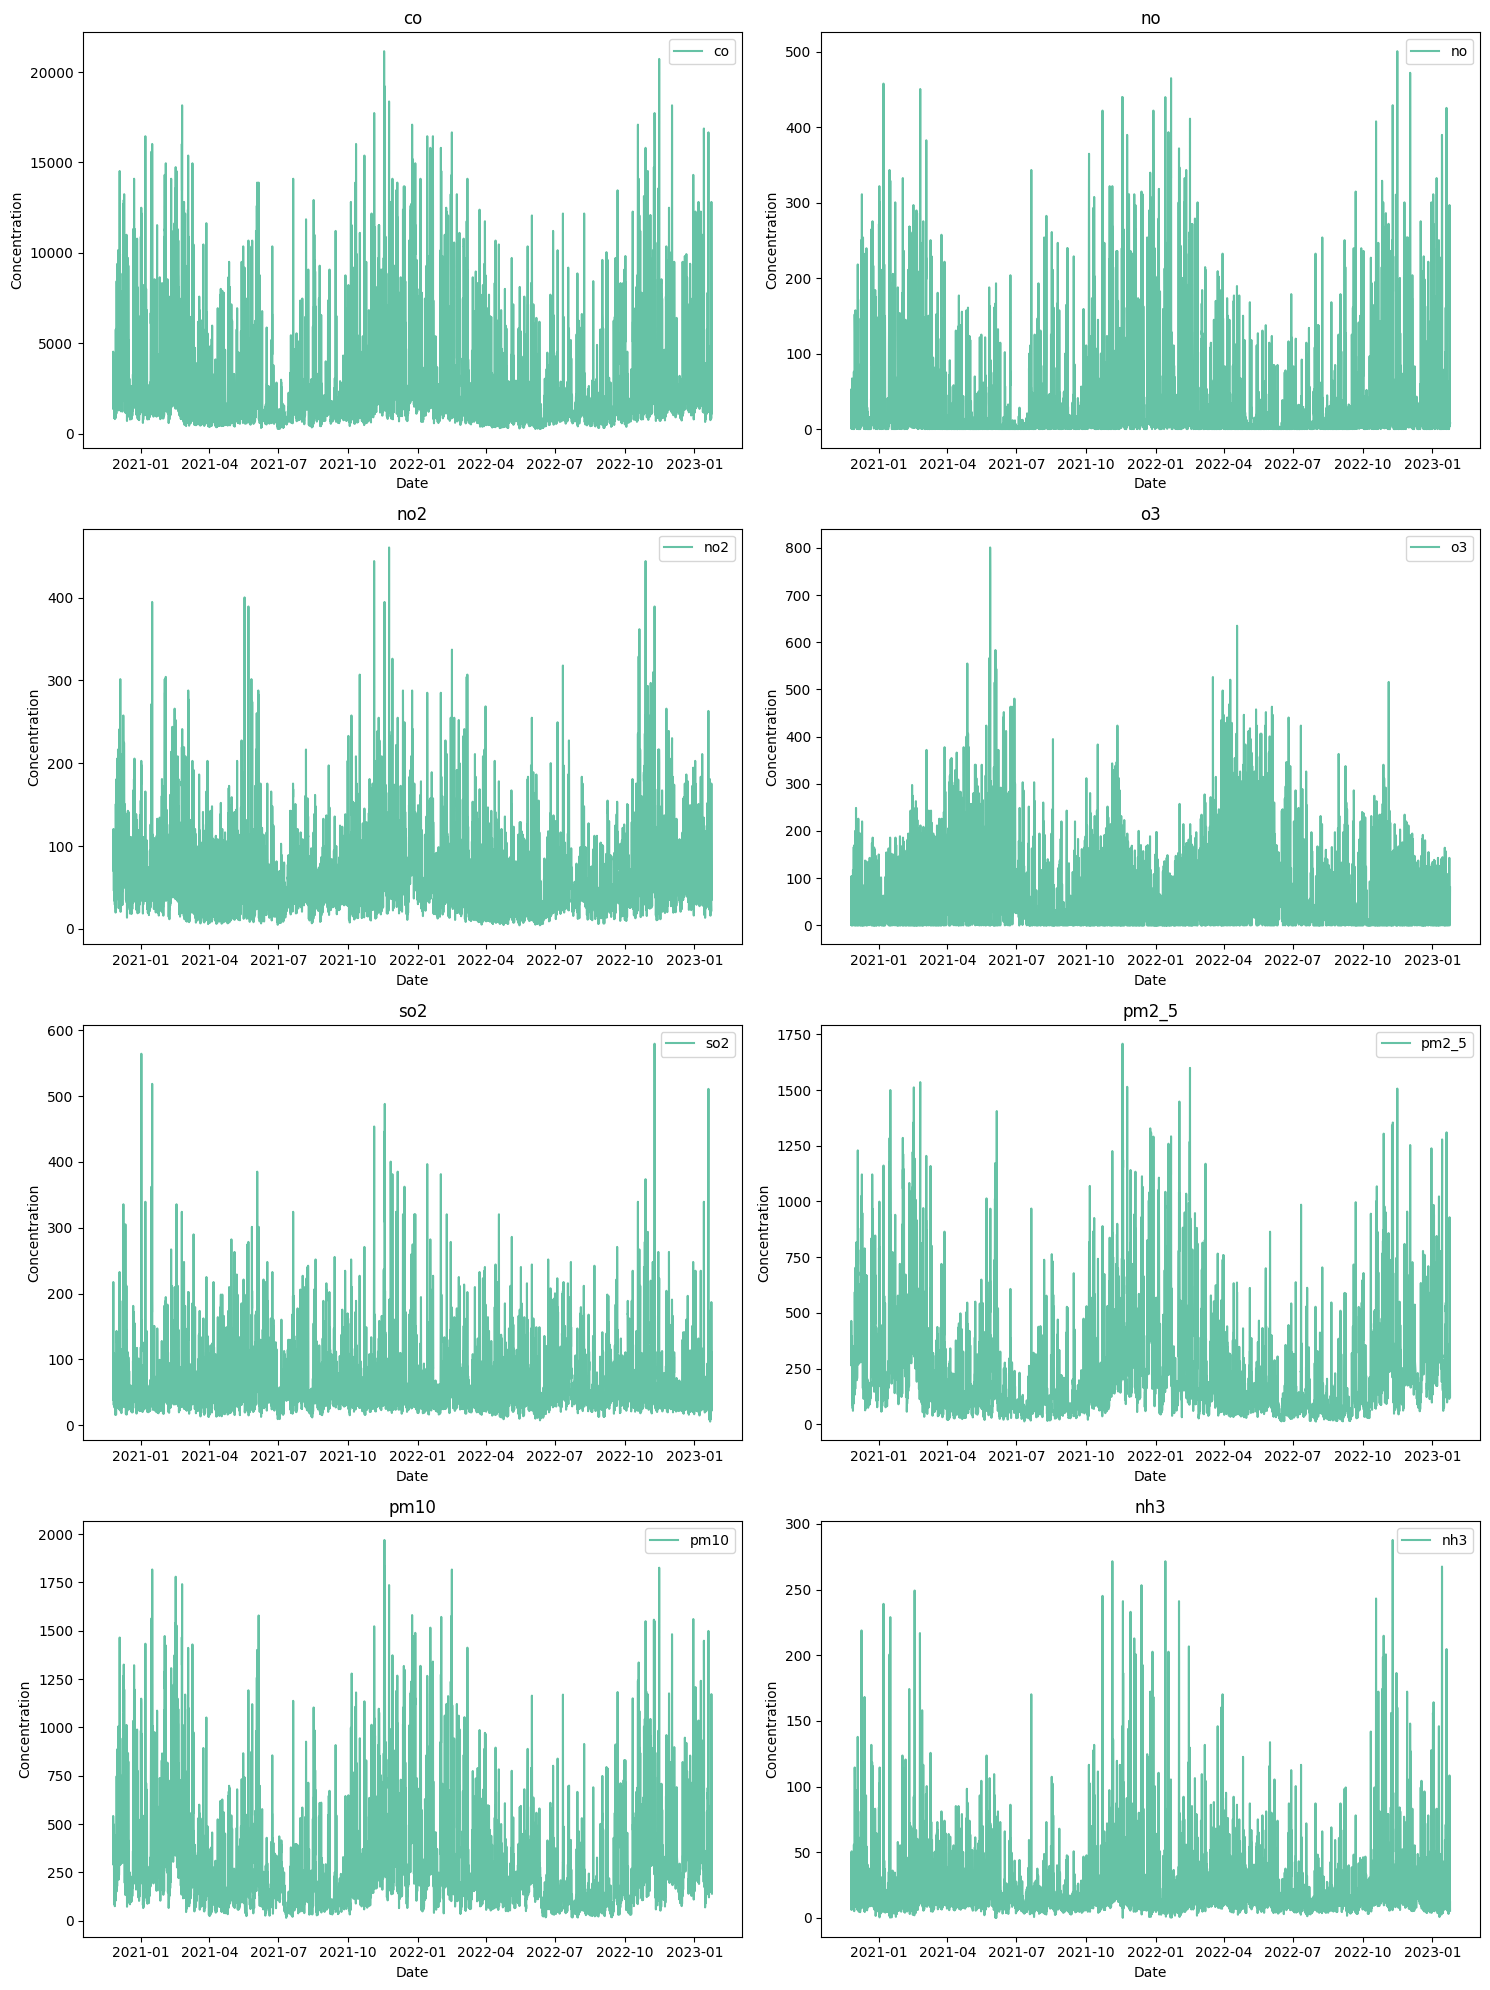

In [12]:
# Time series plots for each pollutant
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
pollutants = data.columns
for i, pollutant in enumerate(pollutants):
    axs[i//2, i%2].plot(data.index, data[pollutant], label=pollutant)
    axs[i//2, i%2].set_title(pollutant)
    axs[i//2, i%2].set_xlabel('Date')
    axs[i//2, i%2].set_ylabel('Concentration')
    axs[i//2, i%2].legend()
plt.tight_layout()
plt.show()

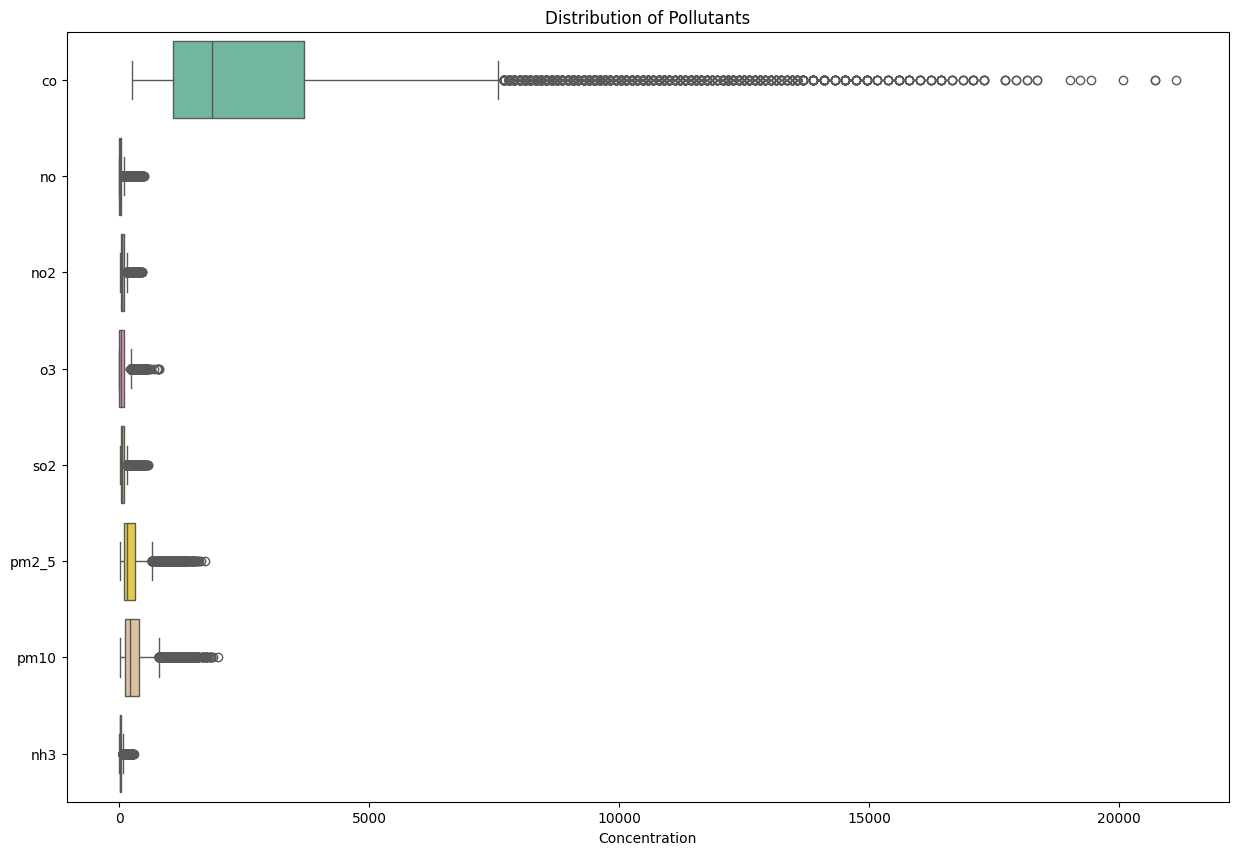

In [13]:
# Box plots for each pollutant
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')
plt.title('Distribution of Pollutants')
plt.xlabel('Concentration')
plt.show()

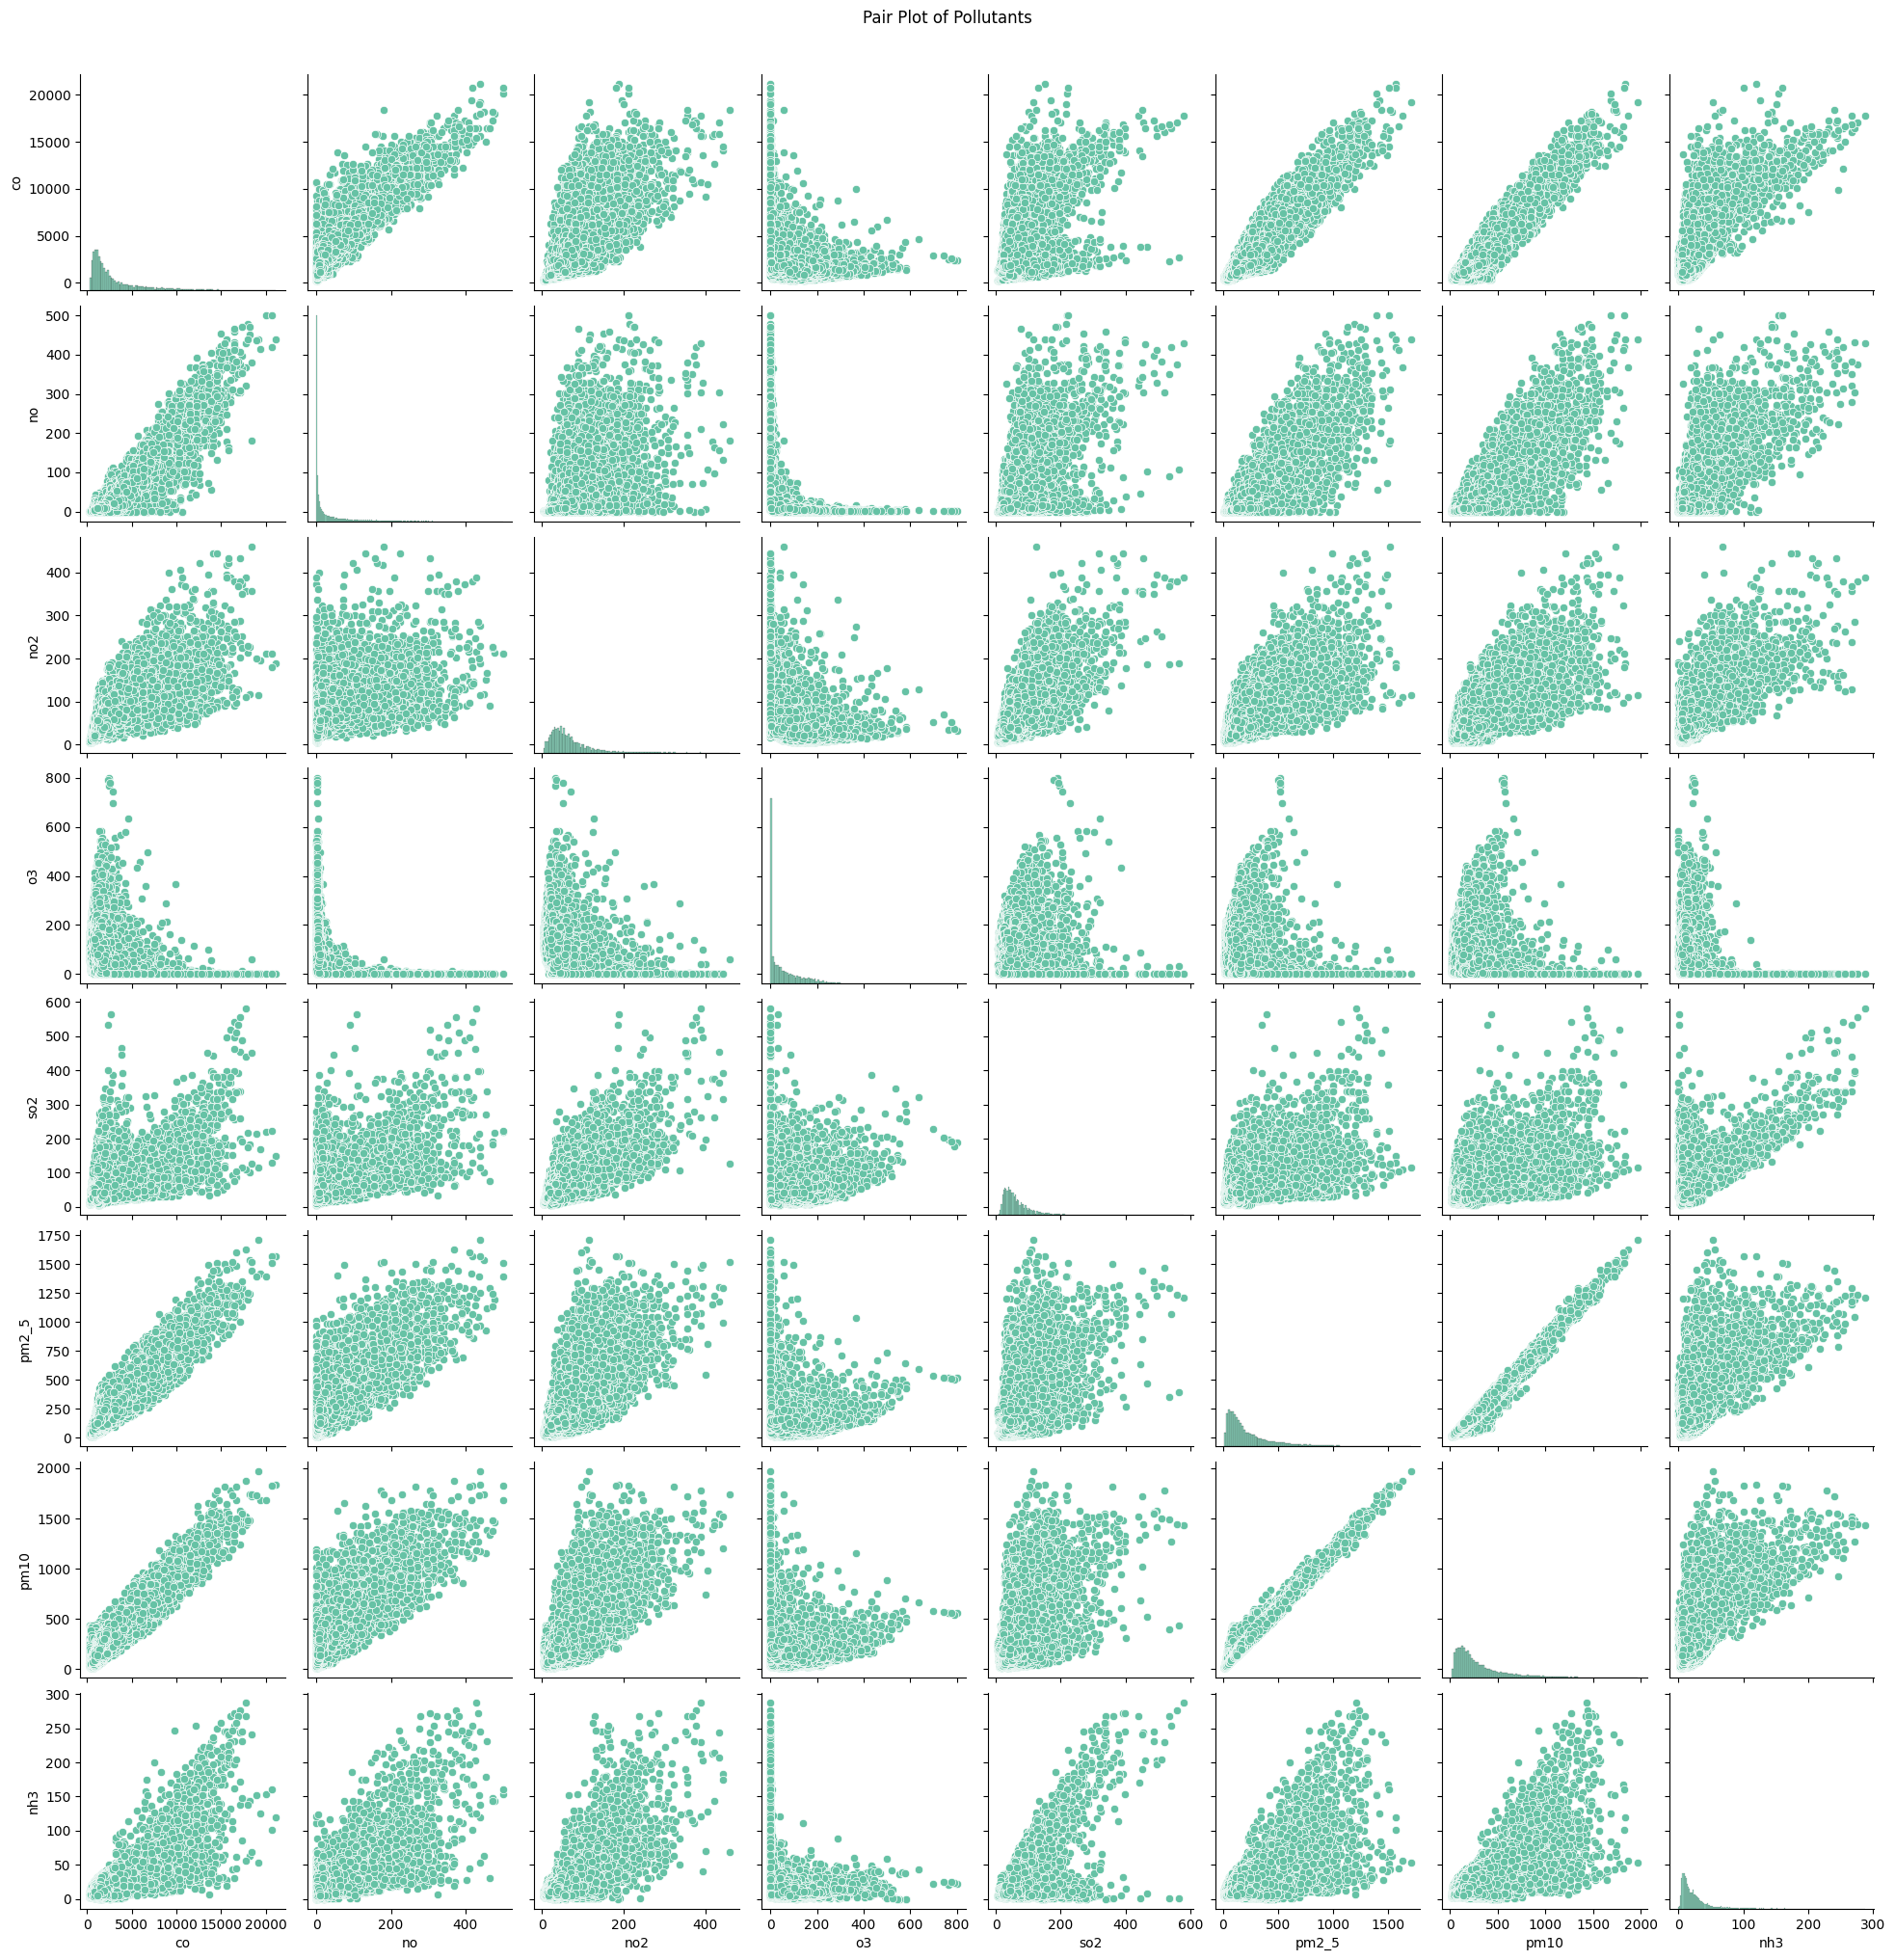

In [14]:
# Pair plots
sns.pairplot(data)
plt.suptitle('Pair Plot of Pollutants', y=1.02)
plt.show()

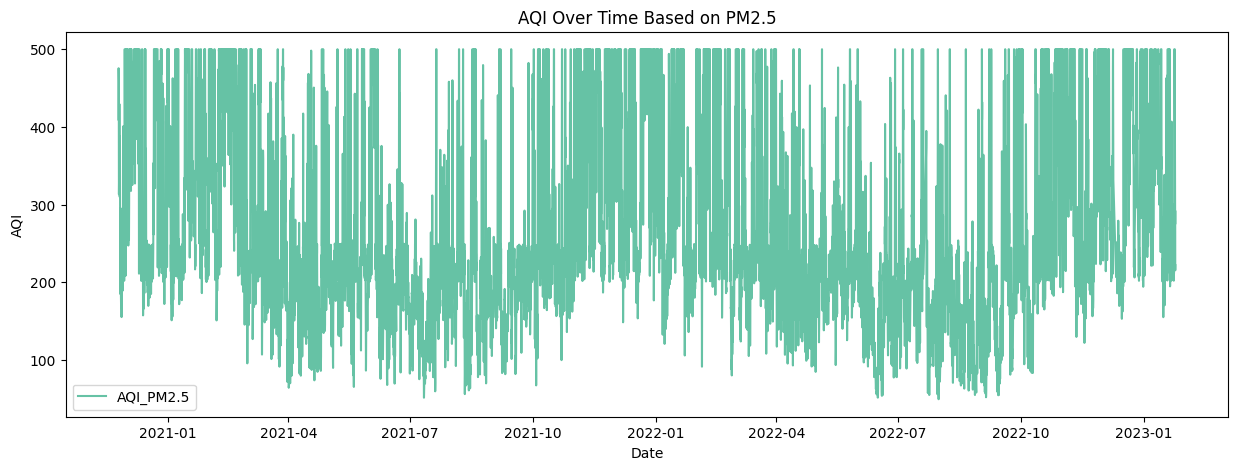

In [15]:
# Simplified AQI calculation for PM2.5
def calculate_aqi(pm25):
    if pm25 <= 12:
        return pm25 * 50 / 12
    elif pm25 <= 35.4:
        return 50 + (pm25 - 12) * 50 / (35.4 - 12)
    elif pm25 <= 55.4:
        return 100 + (pm25 - 35.4) * 50 / (55.4 - 35.4)
    elif pm25 <= 150.4:
        return 150 + (pm25 - 55.4) * 100 / (150.4 - 55.4)
    elif pm25 <= 250.4:
        return 200 + (pm25 - 150.4) * 100 / (250.4 - 150.4)
    elif pm25 <= 350.4:
        return 300 + (pm25 - 250.4) * 100 / (350.4 - 250.4)
    elif pm25 <= 500.4:
        return 400 + (pm25 - 350.4) * 100 / (500.4 - 350.4)
    else:
        return 500

data['AQI_PM2.5'] = data['pm2_5'].apply(calculate_aqi)

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['AQI_PM2.5'], label='AQI_PM2.5')
plt.title('AQI Over Time Based on PM2.5')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

The 'date' column is not found in the dataset.
                          co     no     no2     o3    so2   pm2_5    pm10  \
date                                                                        
2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

                       nh3   AQI_PM2.5  
date                                    
2020-11-25 01:00:00  28.63  409.473333  
2020-11-25 02:00:00  41.04  447.040000  
2020-11-25 03:00:00  49.14  475.520000  
2020-11-25 04:00:00  48.13  469.606667  
2020-11-25 05:00:00  46.61  465.160000  


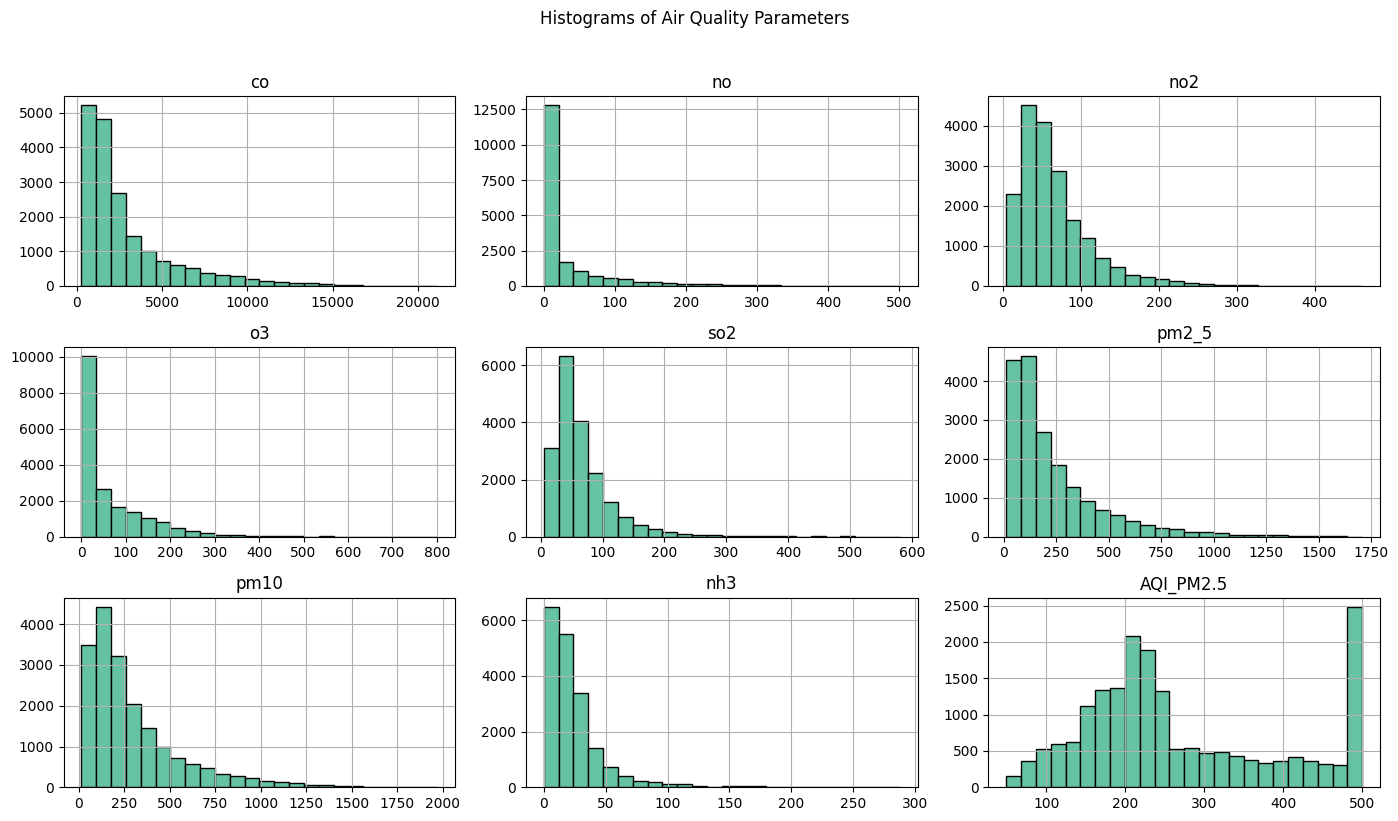

(791, 9)


In [16]:
# Convert date column to datetime if it exists
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
else:
    print("The 'date' column is not found in the dataset.")

print(data.head())

if 'date' in data.columns:
    features = data.drop(columns=['date'])
else:
    features = data

features.hist(bins=24, figsize=(14,8), edgecolor='black')
plt.suptitle('Histograms of Air Quality Parameters', y=1.02)
plt.tight_layout()

sns.set_palette('Set2')
plt.show()

daily_data = data.resample('D').mean()
print(daily_data.shape)

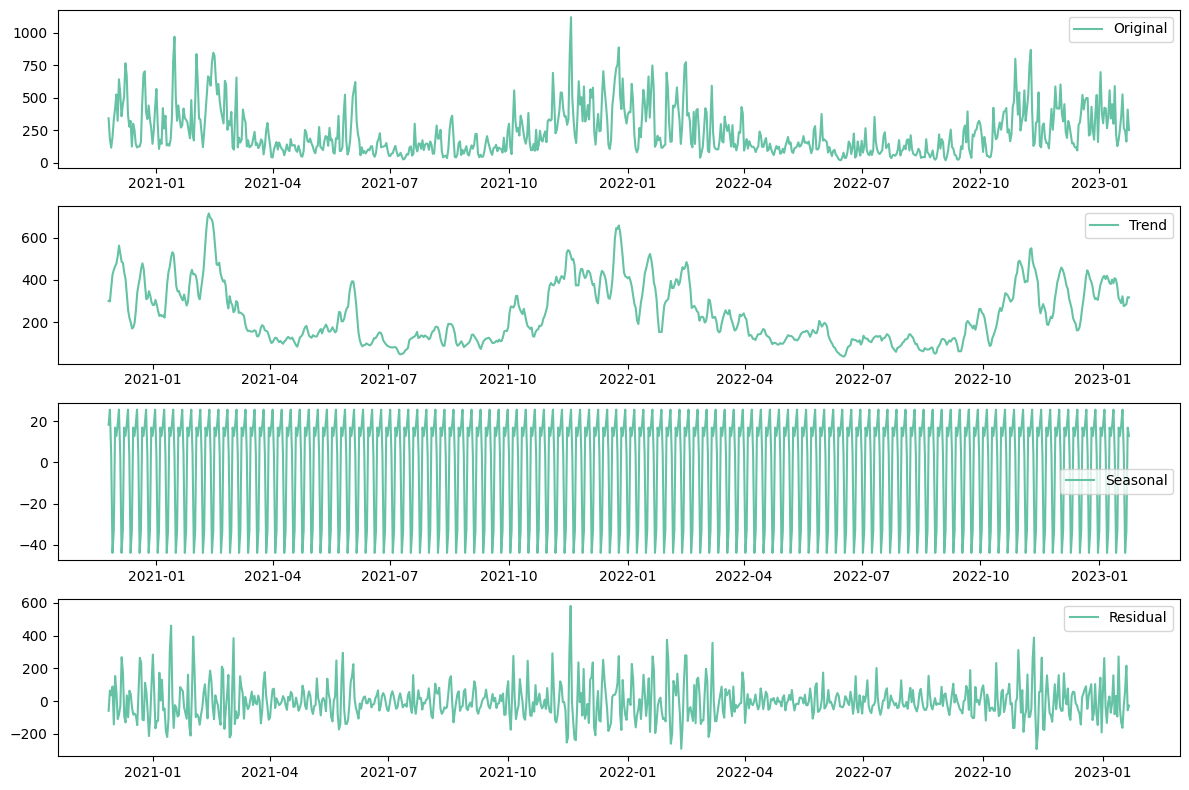

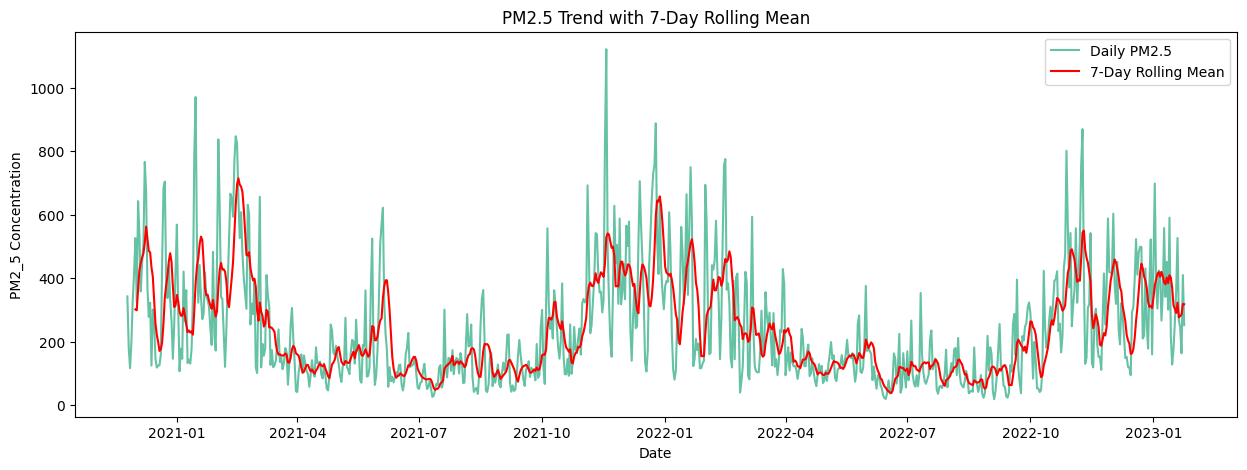

In [22]:
daily_data['pm2_5'].interpolate(method='linear', inplace=True)

decomposition = seasonal_decompose(daily_data['pm2_5'], model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_data['pm2_5'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Apply a 7-day rolling mean to smooth out the data (adjust as needed)
rolling_mean = daily_data['pm2_5'].rolling(window=7).mean()

# Plot the original data and the rolling mean
plt.figure(figsize=(15, 5))
plt.plot(daily_data['pm2_5'], label='Daily PM2.5')
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('PM2.5 Trend with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('PM2_5 Concentration')
plt.legend()
plt.show()


In [19]:
def stl_decomposition(data):
    decomposition = seasonal_decompose(data, model='additive', period=7)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [20]:
def apply_rolling_mean(data, window):
    rolling_mean = data.rolling(window=window).mean()
    return rolling_mean

def calculate_aqi(row):
    return calculate_aqi

def hourly_aqi_analysis(data):
    return hourly_aqi_analysis

def day_night_aqi_comparison(data):
    return day_night_aqi_comparison

def check_and_convert_date_column(data):
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])
        data.set_index('date', inplace=True)
    else:
        print("The 'date' column is not found in the dataset.")

def extract_hour_from_date(data):
    if 'date' in data.columns:
        data['hour'] = data['date'].dt.hour
    else:
        print("The 'date' column is not found in the dataset.")

def check_and_convert_date_column(data):
    return check_and_convert_date_column

def extract_hour_from_date(data):
    return extract_hour_from_date

def calculate_hourly_aqi_and_plot(data):
       return calculate_hourly_aqi_and_plot

def calculate_average_aqi_day_night(data):
      return calculate_average_aqi_day_night

def day_vs_night_aqi_comparison(data):
      return day_vs_night_aqi_comparison

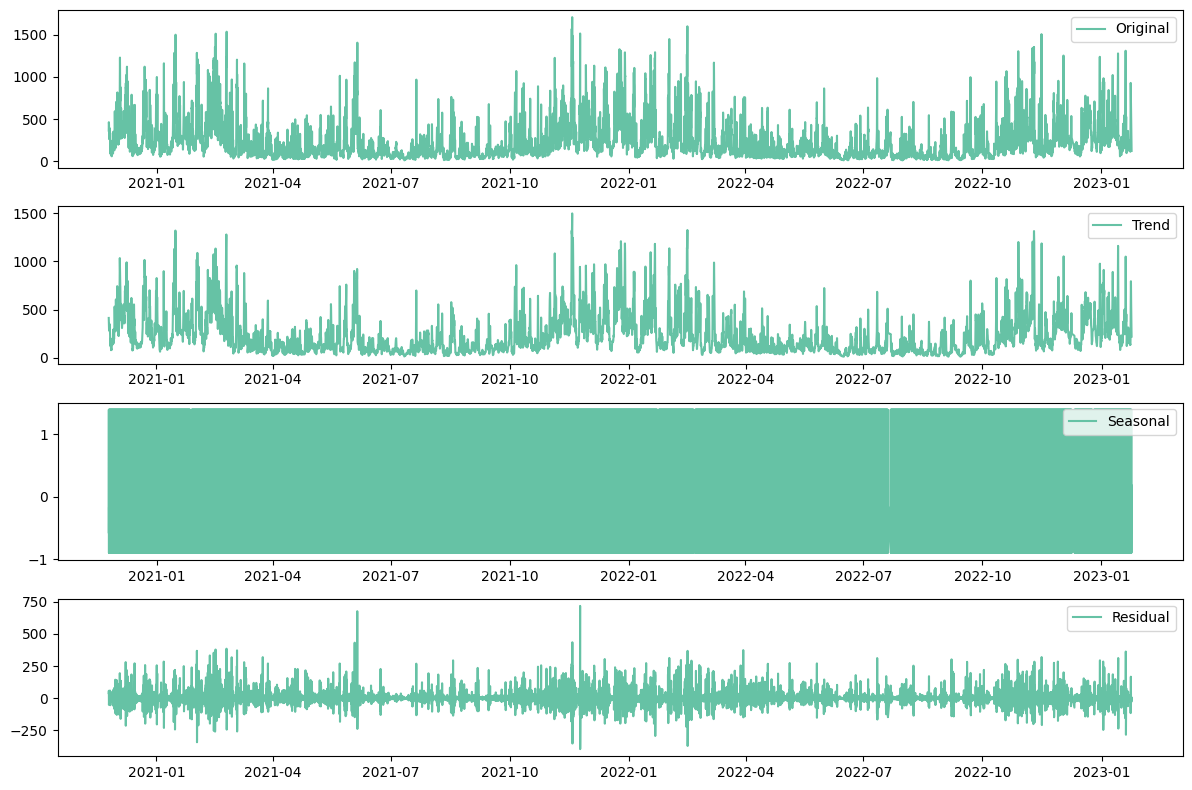

<function __main__.day_vs_night_aqi_comparison(data)>

In [21]:
stl_decomposition(data['pm2_5'])

data['rolling_mean_pm25'] = apply_rolling_mean(data['pm2_5'], window=7)

data['AQI'] = data.apply(calculate_aqi, axis=1)

hourly_aqi_analysis(data)
day_night_aqi_comparison(data)
check_and_convert_date_column(data)
extract_hour_from_date(data)
calculate_hourly_aqi_and_plot(data)
calculate_average_aqi_day_night(data)
day_vs_night_aqi_comparison(data)

**Conclusion:**


The analysis reveals several key insights and actionable strategies to address air quality challenges in Delhi. The findings indicate that the city grapples predominantly with "Very Poor" and "Severe" air quality levels, accounting for 97.33% of the time, while "Good" and "Satisfactory" categories are observed only 2.67% of the time. Hourly trends showcase slightly higher average AQI levels at night compared to daytime, with daily extremes reaching as high as 421.63 and as low as 330.37. Moreover, strong correlations among certain pollutants suggest shared sources or similar dispersion patterns, emphasizing the need for targeted interventions.

To mitigate carbon monoxide (CO) levels specifically, multifaceted strategies are recommended. These include enforcing stringent vehicle emission standards, promoting cleaner fuels like CNG and electric vehicles, optimizing traffic management to reduce congestion and idling, implementing strict emissions regulations for industries, and integrating urban planning initiatives that prioritize mixed land-use and green infrastructure.

Furthermore, overarching strategies for overall air quality improvement encompass promoting renewable energy sources, adopting green building standards, enhancing waste management practices, expanding afforestation and urban greening initiatives, fostering public awareness and education, and fostering cross-sector collaboration to develop and implement comprehensive air quality management plans.

By adopting a holistic approach and implementing these strategies collaboratively, Delhi can significantly improve its air quality, safeguard public health, and create a sustainable environment for current and future generations.